
# EDA: Análisis exploratorio de datos

### Listado de archivos

- train.csv - the training set, contains full history of clinical information
- test.csv - the test set, contains only the baseline measurement
- train/ - contains the training patients' baseline CT scan in DICOM format
- test/ - contains the test patients' baseline CT scan in DICOM format

In [2]:
import os

DATA_PATH = './osic-pulmonary-fibrosis-progression'
list(os.listdir(DATA_PATH))

['test-scans-512',
 'osic-pulmonary-fibrosis-progression.zip',
 '.DS_Store',
 'test',
 'train_pre',
 'test.csv',
 'test_pre',
 'train',
 'train.csv',
 '.ipynb_checkpoints',
 'sample_submission.csv']

In [3]:
TRAIN_CSV_DATA_PATH = './osic-pulmonary-fibrosis-progression/train.csv'
TRAIN_DICOM_DATA_PATH = './osic-pulmonary-fibrosis-progression/train/'
TEST_CSV_DATA_PATH = './osic-pulmonary-fibrosis-progression/test.csv'
TEST_DICOM_DATA_PATH = './osic-pulmonary-fibrosis-progression/test/'

Ejemplo listado incluido en carpeta train:

In [4]:
list(os.listdir(TRAIN_DICOM_DATA_PATH))[:5]

['ID00296637202279895784347',
 'ID00032637202181710233084',
 'ID00061637202188184085559',
 'ID00232637202260377586117',
 'ID00322637202284842245491']

El contenido son nuevas carpetas con un identificador de paciente. Tomografía computarizada en formato DICOM.

Ejemplo listado incluido para cada paciente:

In [6]:
ct_example = list(os.listdir(TRAIN_DICOM_DATA_PATH + 'ID00296637202279895784347'))
print(ct_example[:5])

['16.dcm', '17.dcm', '15.dcm', '29.dcm', '28.dcm']


.dcm files: DICOM files. It's saved in the "Digital Imaging and Communications in Medicine" format. It contains an image from a medical scan, such as an ultrasound or MRI + information about the patient.

https://www.dicomstandard.org/

In [7]:
from pydicom import dcmread

ds_example = dcmread(TRAIN_DICOM_DATA_PATH + 'ID00296637202279895784347/16.dcm')
ds_example

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.12779743606216391659179055517331126608
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']
(0008, 0018) SOP Instance UID                    UI: 2.25.12779743606216391659179055517331126608
(0008, 0060) Modality                            CS: 'CT'
(000

Datos interesantes: id, modality, body part examined

Ver otros para los médicos

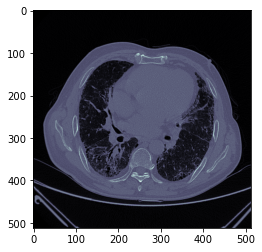

In [14]:
import matplotlib.pyplot as plt

plt.imshow(ds_example.pixel_array, cmap='bone');

In [20]:
print('Total imágenes ejemplo CT:')
print(len(ct_example))

Total imágenes ejemplo CT:
31


In [21]:
print(ct_example)

['16.dcm', '17.dcm', '15.dcm', '29.dcm', '28.dcm', '14.dcm', '10.dcm', '11.dcm', '13.dcm', '12.dcm', '9.dcm', '8.dcm', '6.dcm', '7.dcm', '5.dcm', '4.dcm', '1.dcm', '3.dcm', '2.dcm', '23.dcm', '22.dcm', '20.dcm', '21.dcm', '19.dcm', '31.dcm', '25.dcm', '24.dcm', '30.dcm', '18.dcm', '26.dcm', '27.dcm']


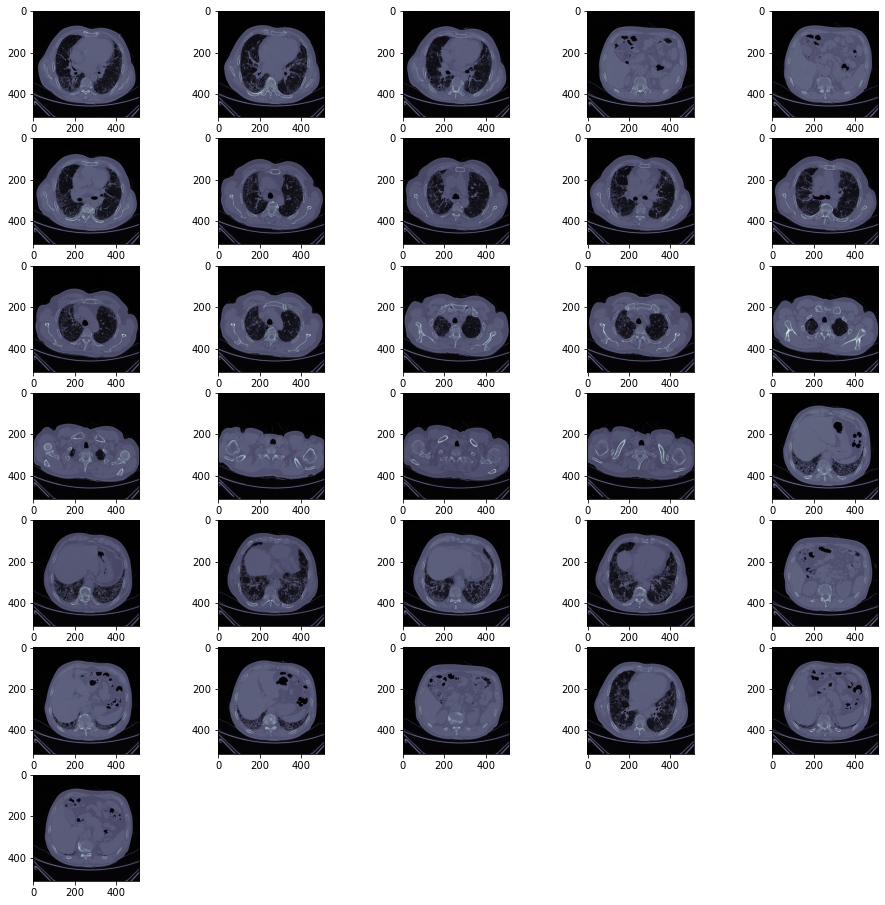

In [22]:
fig = plt.figure(figsize=(16, 16))
columns = 5
rows = 7

i = 1
for item in ct_example:
    ds = dcmread(TRAIN_DICOM_DATA_PATH + 'ID00296637202279895784347/' + item)
    fig.add_subplot(rows, columns, i)
    plt.imshow(ds.pixel_array, cmap='bone')
    i += 1

plt.show()

In [8]:
import pandas as pd
def get_unique_ct_values(path):
    unique_values = {'patient_id': [], 'total_dicom': []}
    for key in list(os.listdir(path)):
        unique_values['patient_id'].append(key)
        unique_values['total_dicom'].append(len(os.listdir(path + key)))

    df_unique = pd.DataFrame(data=unique_values)
    return df_unique

print('Valores únicos por columna dataset entrenamiento:')
valores_unicos = get_unique_ct_values(TRAIN_DICOM_DATA_PATH)
valores_unicos

Valores únicos por columna dataset entrenamiento:


,patient_id,total_dicom
0,ID00296637202279895784347,31
1,ID00032637202181710233084,205
2,ID00061637202188184085559,253
3,ID00232637202260377586117,67
4,ID00322637202284842245491,106
...,...,...
171,ID00285637202278913507108,31
172,ID00067637202189903532242,319
173,ID00214637202257820847190,18
174,ID00009637202177434476278,394


In [18]:
valores_unicos.describe()

,total_dicom
count,176.000000
mean,187.659091
std,179.929662
min,12.000000
25%,33.000000
50%,98.000000
75%,304.500000
max,1018.000000


In [9]:
valores_unicos.total_dicom.sum()

33028

In [24]:
def get_unique_ct_values(path):
    unique_values = {'patient_id': [], 'total_dicom': []}
    for key in list(os.listdir(path)):
        unique_values['patient_id'].append(key)
        unique_values['total_dicom'].append(len(os.listdir(path + key)))

    df_unique = pd.DataFrame(data=unique_values)
    return df_unique

print('Valores únicos por columna dataset test:')
get_unique_ct_values(TEST_DICOM_DATA_PATH)

Valores únicos por columna dataset test:


,patient_id,total_dicom
0,ID00426637202313170790466,408
1,ID00419637202311204720264,28
2,ID00423637202312137826377,290
3,ID00422637202311677017371,473
4,ID00421637202311550012437,62


Comprobar que todos los datos clínicos tienen ct:

In [25]:
def get_patients_with_ct(df, path):
    train_unique_values = get_unique_values(df)
    patients = train_unique_values['unique_values'][0]
    return pd.DataFrame(data=[[key, (len(os.listdir(path + key)) > 1)] for key in patients])

patients_ct_train = get_patients_with_ct(df_train, TRAIN_DICOM_DATA_PATH)
patients_ct_train.head(5)

,0,1
0,ID00007637202177411956430,True
1,ID00009637202177434476278,True
2,ID00010637202177584971671,True
3,ID00011637202177653955184,True
4,ID00012637202177665765362,True


In [26]:
print('Comparativa entrenamiento, tienen todos ct?:')
patients_ct_train.describe()

Comparativa entrenamiento, tienen todos ct?:


,0,1
count,176,176
unique,176,1
top,ID00129637202219868188000,True
freq,1,176


In [27]:
patients_ct_train = get_patients_with_ct(df_test, TEST_DICOM_DATA_PATH)
patients_ct_train.head(5)

,0,1
0,ID00419637202311204720264,True
1,ID00421637202311550012437,True
2,ID00422637202311677017371,True
3,ID00423637202312137826377,True
4,ID00426637202313170790466,True


In [28]:
print('Comparativa test, tienen todos ct?:')
patients_ct_train.describe()

Comparativa test, tienen todos ct?:


,0,1
count,5,5
unique,5,1
top,ID00421637202311550012437,True
freq,1,5


Visualización usando animación

https://www.kaggle.com/pranavkasela/interactive-and-animated-ct-scan

In [29]:
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

files = np.array([f.replace('.dcm', '') for f in os.listdir(TRAIN_DICOM_DATA_PATH + 'ID00296637202279895784347')])
files = np.sort(files.astype('int'))

fig = plt.figure()
images = []
for item in files:
    tmp = dcmread(TRAIN_DICOM_DATA_PATH + 'ID00296637202279895784347/' + str(item) + '.dcm')
    slope = tmp.RescaleSlope
    intercept = tmp.RescaleIntercept
    final = tmp.pixel_array * slope + intercept
    images.append(final)
    
images = np.array(images) 

fig = plt.figure()

ims = []
for image in images:
    im = plt.imshow(image, animated=True, cmap='bone')
    plt.axis('off')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=False)

plt.close()
HTML(ani.to_jshtml())

<Figure size 432x288 with 0 Axes>